In [1]:
import pandas as pd
import matplotlib

# Abrir e explorar arquivo

In [2]:
df = pd.read_csv('train.csv', low_memory=False, parse_dates=[1])
df.shape

(79425, 15)

In [3]:
df.head()

,ID,submission_date,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_state,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend,rating
0,1,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,1958.0,F,RJ,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,Estou contente com a compra entrega rápida o ú...,Yes,4
1,2,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,1996.0,M,SC,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade","Por apenas R$1994.20,eu consegui comprar esse ...",Yes,4
2,3,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,1984.0,M,SP,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes,4
3,4,2018-01-01 01:27:23,28b1844e1cd24dd2288b7cafb052a0b46aed53ab28e1c1...,1979.0,M,PA,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",Produto imperdível,"Excelente produto, por fora em material acríli...",Yes,5
4,5,2018-01-01 01:54:38,48907a04d70947344017b351e8fc232bfc80dae2c33ac2...,NaN,NaN,NaN,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",ótimo,"produto mto bom, com essa garrafinha vc pode a...",Yes,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79425 entries, 0 to 79424
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     79425 non-null  int64         
 1   submission_date        79425 non-null  datetime64[ns]
 2   reviewer_id            79425 non-null  object        
 3   reviewer_birth_year    75874 non-null  float64       
 4   reviewer_gender        76941 non-null  object        
 5   reviewer_state         77023 non-null  object        
 6   product_id             79425 non-null  object        
 7   product_name           79373 non-null  object        
 8   product_brand          24646 non-null  object        
 9   site_category_lv1      79421 non-null  object        
 10  site_category_lv2      77007 non-null  object        
 11  review_title           79248 non-null  object        
 12  review_text            77458 non-null  object        
 13  r

- Dados completos para: ['ID', 'submission_date', 'reviewer_id', 'product_id', 'rating']
- Coluna 'product_brand' faltando 70% dos valores


In [5]:
df.describe()

,ID,submission_date,reviewer_birth_year,rating
count,79425.000000,79425,75874.000000,79425.000000
mean,39713.000000,2018-03-16 22:37:57.901315584,1977.525015,3.486572
min,1.000000,2018-01-01 00:11:28,59.000000,1.000000
25%,19857.000000,2018-01-29 10:17:20,1969.000000,2.000000
50%,39713.000000,2018-03-22 06:15:50,1980.000000,4.000000
75%,59569.000000,2018-04-24 06:17:54,1987.000000,5.000000
max,79425.000000,2018-05-31 23:50:33,2018.000000,5.000000
std,22928.166902,NaN,20.102430,1.532714


- Some errors in column 'reviewr_birth_year' (min = 59, max = 2018)

# Balanceamento das saída (rating)

<Axes: title={'center': 'Contagem de rating'}, xlabel='rating'>

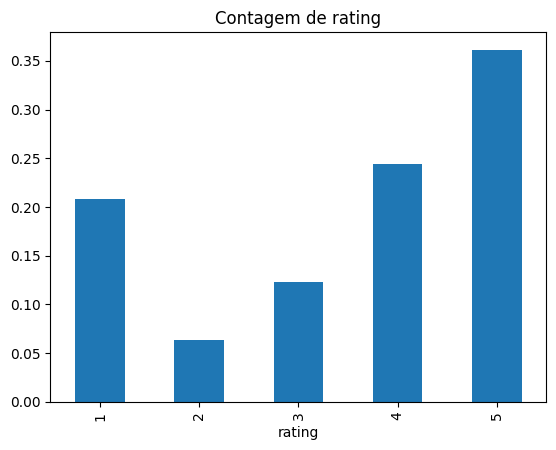

In [6]:
#Balanciamento dos ratings

df.rating.value_counts(normalize=True).sort_index().plot(kind='bar', title='Contagem de rating')

Enquanto 35% das avaliações são de 5 pts, apenas 5% são de 2 pts. Desbalanço siognificativo.

# Busca por correlações e informações dos campos

## recommend_to_a_frient

In [7]:
df.recommend_to_a_friend.value_counts()

recommend_to_a_friend
Yes    57671
No     21743
Name: count, dtype: int64

<Axes: xlabel='rating'>

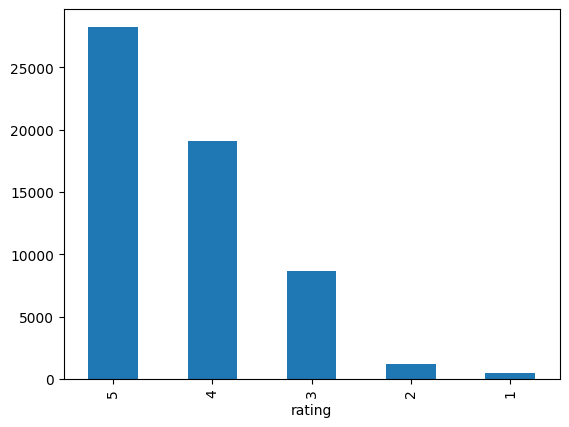

In [8]:
df[df['recommend_to_a_friend']=='Yes'].rating.value_counts().plot(kind='bar')

<Axes: xlabel='rating'>

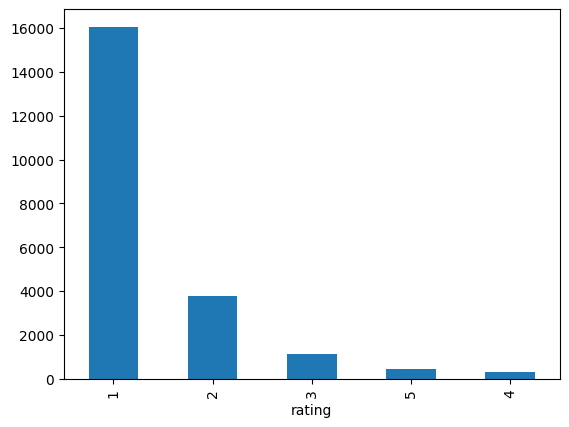

In [9]:
df[df['recommend_to_a_friend']=='No'].rating.value_counts().plot(kind='bar')

## reviewer_birth_year

In [10]:
#Correlação entre idade e avaliação

df[['reviewer_birth_year','rating']].corr()

,reviewer_birth_year,rating
reviewer_birth_year,1.000000,0.002679
rating,0.002679,1.000000


Não há correlação óbvia entre data de nascimento e ratings... mas é bom verificar se não há alguma correlação 'não linear'.

In [11]:
df.reviewer_birth_year.value_counts().sort_index()

reviewer_birth_year
59.0      1
61.0      1
66.0      1
78.0      1
88.0      1
         ..
2008.0    2
2009.0    7
2010.0    7
2017.0    3
2018.0    3
Name: count, Length: 110, dtype: int64

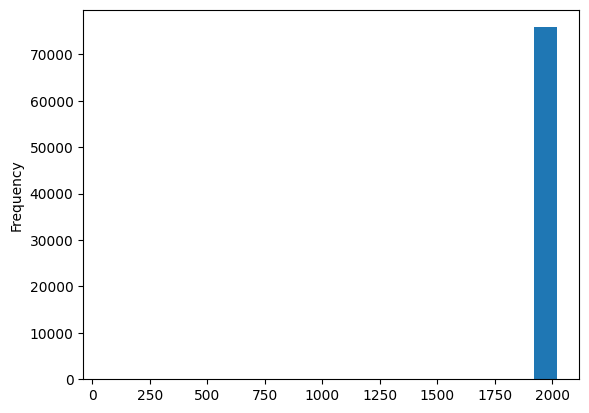

In [12]:
ax = df.reviewer_birth_year.plot.hist(bins=20)

Algumas revisões contém erros no ano (falta o 1900, ou aparente inversão de números)... a princípio, ignoremos

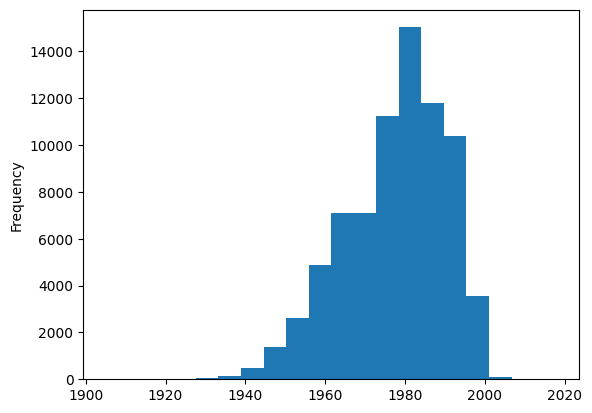

In [13]:
ax = df[df['reviewer_birth_year']>1900].reviewer_birth_year.plot.hist(bins=20)

In [14]:
# Criar um campo de décadas para buscar alguma correlação não linear entre idade e rating
df['decada'] = df['reviewer_birth_year'].apply(lambda x: x // 10 *10)


In [15]:
df.groupby('decada').rating.describe()

,count,mean,std,min,25%,50%,75%,max
decada,,,,,,,,
50.0,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
60.0,2.0,3.500000,2.121320,2.0,2.75,3.5,4.25,5.0
70.0,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
80.0,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
1890.0,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
1900.0,21.0,3.190476,1.470342,1.0,2.00,3.0,4.00,5.0
1910.0,6.0,2.666667,1.211060,1.0,2.00,2.5,3.75,4.0
1920.0,23.0,3.130435,1.632186,1.0,1.50,3.0,5.00,5.0
1930.0,213.0,3.497653,1.546830,1.0,2.00,4.0,5.00,5.0


<Axes: xlabel='decada'>

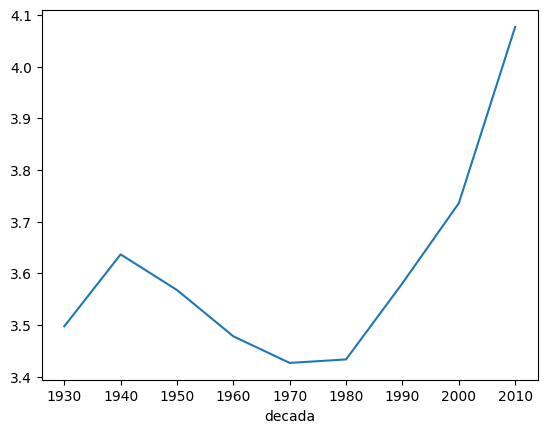

In [16]:
df[df['decada']>1920].groupby('decada').rating.mean().plot()

Aparente relação entre idade e média do rating, porém não maior que 0.5 pontos

<Axes: xlabel='decada'>

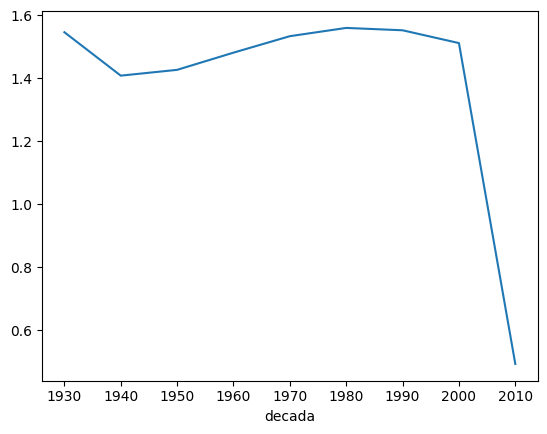

In [17]:
df[df['decada']>1920].groupby('decada').rating.std().plot()

Pouca variação no desvio dos ratings (exceção decada de 2010, com poucos tarings):

<Axes: xlabel='decada'>

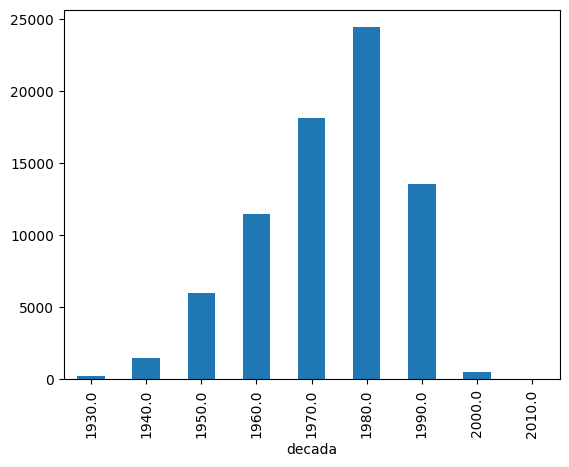

In [18]:
df[df['decada']>1920].groupby('decada').rating.count().plot(kind='bar')

## reviewer_gender

In [19]:
# Variação por gênero

df.reviewer_gender.value_counts()

reviewer_gender
M    39561
F    37380
Name: count, dtype: int64

In [20]:
df[['reviewer_gender','rating']].groupby(['reviewer_gender']).describe()

rating                                             
                   count      mean       std  min  25%  50%  75%  max
reviewer_gender                                                      
F                37380.0  3.512868  1.515191  1.0  2.0  4.0  5.0  5.0
M                39561.0  3.450621  1.542848  1.0  2.0  4.0  5.0  5.0

F         Axes(0.1,0.15;0.363636x0.75)
M    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

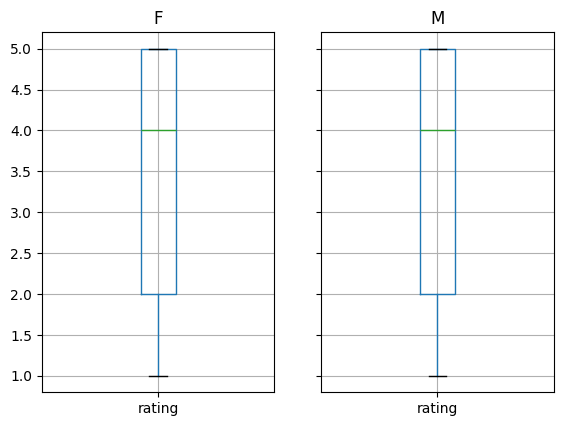

In [21]:
df.groupby('reviewer_gender').boxplot(column='rating')

não parece haver correlação relevante

# reviewer_state

In [22]:
df.reviewer_state.value_counts()

reviewer_state
SP    29521
RJ    10577
MG     9794
PR     4002
RS     3944
BA     2918
SC     2618
ES     1834
PE     1825
GO     1536
DF     1434
CE     1301
PA      894
MA      691
MT      611
RN      564
PB      524
MS      509
AL      474
PI      440
SE      332
TO      235
RO      169
AM      116
AP       66
AC       53
RR       41
Name: count, dtype: int64

In [23]:
df[['reviewer_state','rating']].groupby('reviewer_state').describe()

rating                                             
                  count      mean       std  min  25%  50%  75%  max
reviewer_state                                                      
AC                 53.0  3.547170  1.612046  1.0  2.0  4.0  5.0  5.0
AL                474.0  3.508439  1.563637  1.0  2.0  4.0  5.0  5.0
AM                116.0  3.336207  1.593159  1.0  2.0  4.0  5.0  5.0
AP                 66.0  3.560606  1.520413  1.0  3.0  4.0  5.0  5.0
BA               2918.0  3.371487  1.534129  1.0  2.0  4.0  5.0  5.0
CE               1301.0  3.441199  1.583752  1.0  2.0  4.0  5.0  5.0
DF               1434.0  3.495119  1.505622  1.0  2.0  4.0  5.0  5.0
ES               1834.0  3.427481  1.534981  1.0  2.0  4.0  5.0  5.0
GO               1536.0  3.509766  1.555039  1.0  2.0  4.0  5.0  5.0
MA                691.0  3.434153  1.531199  1.0  2.0  4.0  5.0  5.0
MG               9794.0  3.501123  1.517201  1.0  2.0  4.0  5.0  5.0
MS                509.0  3.418468  1.578564  1.0  2.0  4.0  5.0  5.0
MT                611.0  3.399345  1.539938  1.0  2.0  4.0  5.0  5.0
PA                894.0  3.445190  1.584787  1.0  2.0  4.0  5.0  5.0
PB                524.0  3.564885  1.542758  1.0  2.0  4.0  5.0  5.0
PE               1825.0  3.591781  1.517240  1.0  3.0  4.0  5.0  5.0
PI                440.0  3.306818  1.613990  1.0  1.0  4.0  5.0  5.0
PR               4002.0  3.616692  1.501312  1.0  3.0  4.0  5.0  5.0
RJ              10577.0  3.379030  1.579268  1.0  2.0  4.0  5.0  5.0
RN                564.0  3.421986  1.526304  1.0  2.0  4.0  5.0  5.0
RO                169.0  3.591716  1.505601  1.0  3.0  4.0  5.0  5.0
RR                 41.0  3.658537  1.559002  1.0  3.0  4.0  5.0  5.0
RS               3944.0  3.511663  1.524960  1.0  2.0  4.0  5.0  5.0
SC               2618.0  3.461421  1.545465  1.0  2.0  4.0  5.0  5.0
SE                332.0  3.463855  1.499815  1.0  2.0  4.0  5.0  5.0
SP              29521.0  3.502016  1.508851  1.0  2.0  4.0  5.0  5.0
TO                235.0  3.480851  1.586082  1.0  2.0  4.0  5.0  5.0

também pouca correlação da média e do desvio padrão

## product_id

In [24]:
df.product_id.value_counts().size

33038

## site_category_lv1 e lv2

In [25]:
df.site_category_lv1.value_counts()

site_category_lv1
Celulares e Smartphones           12501
Eletroportáteis                    7051
Beleza e Perfumaria                5346
Utilidades Domésticas              4944
TV e Home Theater                  4609
Informática e Acessórios           4461
Móveis                             4376
Brinquedos                         2812
Casa e Construção                  2641
Informática                        2580
Livros                             2499
Automotivo                         2290
Eletrodomésticos                   2290
Games                              2093
Bebês                              1818
Cama, Mesa e Banho                 1766
Esporte e Lazer                    1746
Saúde                              1699
Moda                               1539
Ferramentas e Jardim               1042
Áudio                               924
Decoração                           914
Relógios                            904
Pet Shop                            789
Suplementos e Vitamina

In [26]:
df.site_category_lv1.value_counts().size

53

In [27]:
df.site_category_lv2.value_counts()

site_category_lv2
Smartphone                 10586
TV                          3759
Cabelo                      1540
Notebook                    1503
Acessórios para Celular     1383
                           ...  
Religioso / Gospel             1
Acabamentos para Motos         1
Sem Lactose                    1
Filtro de Barro                1
Literatura Infantil            1
Name: count, Length: 678, dtype: int64

## Análise do campo review_title

<Axes: ylabel='Frequency'>

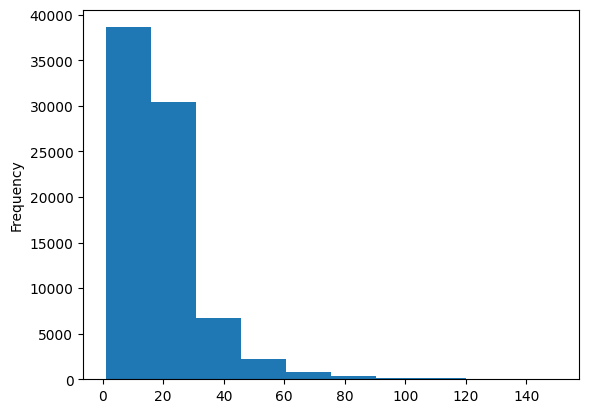

In [28]:
# lenth of titles and reviews

df.review_title.apply(lambda x: len(str(x))).plot.hist()

In [29]:
df[df.review_title.apply(lambda x: len(str(x)))>149].review_text.values[0]

'ESTAVA OLHANDO ONTEM A NOITE (22/04) O PRODUTO QUE CUSTAVA 666,05, POR ESSA MESMA LOJA, O NOTEBOOK DESCARREGOU DEIXEI PRA COMPRAR HOJE (23/04) QUANDO ME DEPARO COM ESSE PREÇO ABSURDO DE 815,00. AUMENTO ESTRATOSFÉRICO.'

Podemos ver ue algumas revisões não são exatamente revisões... são apenas reclamações

## Análise do campo review_text

<Axes: ylabel='Frequency'>

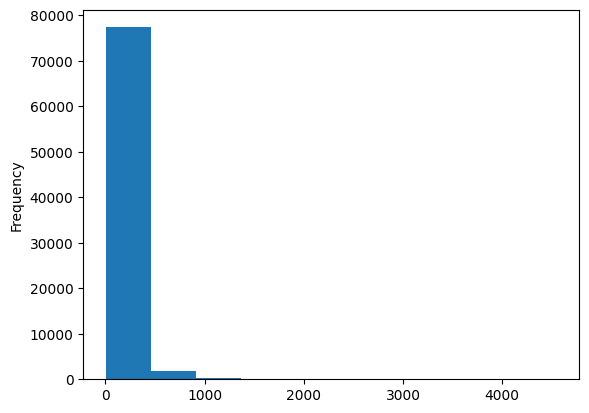

In [30]:

df.review_text.apply(lambda x: len(str(x))).plot.hist()


<Axes: ylabel='Frequency'>

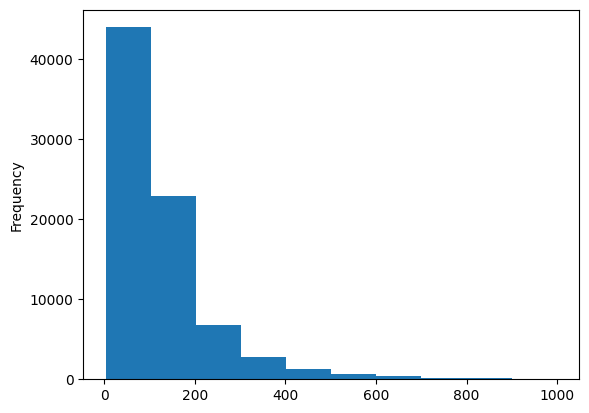

In [31]:

df[df.review_text.apply(lambda x: len(str(x)))<1000].review_text.apply(lambda x: len(str(x))).plot.hist()

In [32]:
# lista dos reviews mais longos (>2000)

df[df.review_text.apply(lambda x: len(str(x)))>2000].review_text

41768    SanDisk Ultra Dual Usb Drive 3.0, 128 GbO San ...
42810    Produto cancelado.Produto cancelado.Produto ca...
43177    Pra quem precisa de um smartphone com um preço...
43589    Precisava comprar uma tv nova, e, vendo a dife...
63763    ele e whrgeyretr36ryt3r3bh3irj3uy4rur3ir5irhgr...
70636    O produto é realmente muito bom. Como não tenh...
71792    PRODUTO AINDA NÃO CHEGOU PRODUTO AINDA NÃO CHE...
78500    Adoro a minha Airfryer! Mas... a tomada pegou ...
78913    Porque não recomendo este produto:  1) O produ...
Name: review_text, dtype: object

In [21]:
text = df[df.index == 43177].review_text.values[0]

In [22]:
text

'Pra quem precisa de um smartphone com um preço mais acessível, esta é uma boa escolha que existe no mercado levando em conta o custo x benefício. O estranho é que o produto não vem com manual de instruções e sim apenas com um guia rápido; daí veio a dificuldade pra mim editar os grupos de contatos, que até agora não obtive êxito. Pra poder ouvir músicas, apenas o Play Música instalado, mas este player não é fácil de usar. Baixei o mídia player VLC para ter mais autonomia no uso e para montar minhas listas de reprodução com mais facilidade. Pra quem usa o smartphone durante o dia, leve o carregador consigo, pois a bateria não passa de 1 dia; portanto, não é de longa duração. A câmera por ser de 8MP, poderia ter uma qualidade melhor, mas não deixa a desejar. O foco parece tirar as fotos mais de perto, porém tem muitos recursos e boas a ótimas configurações; a câmera de 5MP da frente, também tem a mesma característica. Pontos positivos: Tela grande de 5", Android 5.0.2 lollipop eficiente

In [12]:
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr|Sr|Sra)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|Sr|Sra|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|edu|me)"
digits = "([0-9])"
multiple_dots = r'\.{2,}'

def separador_sentencas(text: str) -> list[str]:
    """
    Split the text into sentences.

    If the text contains substrings "<prd>" or "<stop>", they would lead 
    to incorrect splitting because they are used as markers for splitting.

    :param text: text to be split into sentences
    :type text: str

    :return: list of sentences
    :rtype: list[str]
    """
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
    text = re.sub(multiple_dots, lambda match: "<prd>" * len(match.group(0)) + "<stop>", text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = [s.strip() for s in sentences]
    if sentences and not sentences[-1]: sentences = sentences[:-1]
    return sentences

In [23]:
separador_sentencas(text)

['Pra quem precisa de um smartphone com um preço mais acessível, esta é uma boa escolha que existe no mercado levando em conta o custo x benefício.',
 'O estranho é que o produto não vem com manual de instruções e sim apenas com um guia rápido; daí veio a dificuldade pra mim editar os grupos de contatos, que até agora não obtive êxito.',
 'Pra poder ouvir músicas, apenas o Play Música instalado, mas este player não é fácil de usar.',
 'Baixei o mídia player VLC para ter mais autonomia no uso e para montar minhas listas de reprodução com mais facilidade.',
 'Pra quem usa o smartphone durante o dia, leve o carregador consigo, pois a bateria não passa de 1 dia; portanto, não é de longa duração.',
 'A câmera por ser de 8MP, poderia ter uma qualidade melhor, mas não deixa a desejar.',
 'O foco parece tirar as fotos mais de perto, porém tem muitos recursos e boas a ótimas configurações; a câmera de 5MP da frente, também tem a mesma característica.',
 'Pontos positivos: Tela grande de 5", And

In [16]:
for item in separador_sentencas(str(text)):
    print(item)

43177    Pra quem precisa de um smartphone com um preço...
Name: review_text, dtype: object


In [33]:
# Ver o maior texto existente
print(df.loc[df.review_text.apply(lambda x: len(str(x))) == df.review_text.apply(lambda x: len(str(x))).max()].review_text.values[0])
print('Max len:', df.review_text.apply(lambda x: len(str(x))).max())

ele e whrgeyretr36ryt3r3bh3irj3uy4rur3ir5irhgr[tlgrjyrnyrjyrhyurhyuyruvhyr3t3tv3ttcomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em portuguescomo baixar sony vegas 32 bits crackeado 2017 em

## Buscar diferenças entre 4 e 5

In [43]:

df_4 = df[df['rating']==4]
df_5 = df[df['rating']==5]

df_1 = df[df['rating']==1]
df_2 = df[df['rating']==2]

df_3 = df[df['rating']==3]


In [50]:
df.reviewer_gender.value_counts(normalize=True)

reviewer_gender
M    0.514173
F    0.485827
Name: proportion, dtype: float64